EXERCISE 1

In [ ]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"


import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [ ]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

In [ ]:
countries.cx[:40,:50]

COUNTRY                                           geometry
0      Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1      Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
3                  Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
5                  Albania  POLYGON ((20.79192 40.43154, 20.78722 40.39472...
7                  Andorra  POLYGON ((1.44583 42.60194, 1.48653 42.65041, ...
..                     ...                                                ...
245                 Zambia  POLYGON ((30.21302 -14.98172, 30.21917 -15.096...
246               Zimbabwe  POLYGON ((32.48888 -21.34445, 32.46541 -21.325...
247            South Sudan  POLYGON ((34.21807 9.96458, 34.20722 9.90500, ...
250  Curacao (Netherlands)  POLYGON ((-68.96556 12.19889, -68.91196 12.181...
251  Bonaire (Netherlands)  POLYGON ((-68.19736 12.22264, -68.19292 12.207...

[165 rows x 2 columns]

<Axes: >

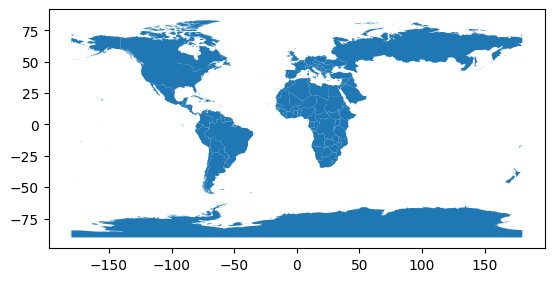

In [ ]:
#then
countries.cx[:40,:50].plot()

In [ ]:
switzerland =countries[countries.COUNTRY=='Switzerland']

In [ ]:
citiesSwitzerland_clipped = gpd.clip(gdf=cities,
                          mask=switzerland)
riversSwitzerland_clipped = gpd.clip(gdf=rivers,
                               mask=switzerland)

<Axes: >

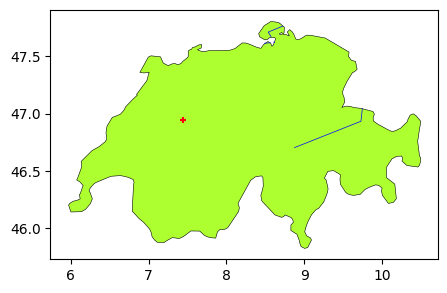

In [ ]:
base = switzerland.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesSwitzerland_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversSwitzerland_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

EXERCISE 2

In [ ]:

switzerland.to_crs(2056).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
# now this works with no warning
switzerland.to_crs(2056).centroid

210    POINT (2660562.350 1183909.065)
dtype: geometry

<Axes: >

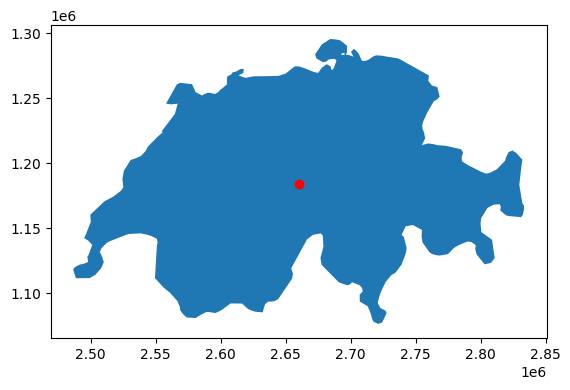

In [ ]:
# replotting:

base2056=switzerland.to_crs(2056).plot()
switzerland.to_crs(2056).centroid.plot(color='red',ax=base2056)

In [ ]:
switzerland_2056=switzerland.to_crs(2056)
cities_switzerland_2056=citiesSwitzerland_clipped.to_crs(switzerland_2056.crs)
rivers_switzerland_2056=riversSwitzerland_clipped.to_crs(switzerland_2056.crs)

In [ ]:
## saving


import os

switzerland_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='country', driver="GPKG")
cities_switzerland_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='cities', driver="GPKG")
rivers_switzerland_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='rivers', driver="GPKG")
switzerland_2056.centroid.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='centroid', driver="GPKG")

EXERCISE 3


In [ ]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","ch-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


id    ident            type                                    name  \
0      4505     LSZH   large_airport                          Zürich Airport   
1      4490     LSGG   large_airport   Geneva Cointrin International Airport   
2      4503     LSZB  medium_airport                            Bern Airport   
3      4492     LSGS  medium_airport                            Sion Airport   
120  513826  CH-0011        heliport   Zürich Triemli City Hospital Heliport   
121  513828  CH-0013        heliport      Zürich Waid City Hospital Heliport   
122  513829  CH-0014        heliport     Zurich Children's Hospital Heliport   
123  513830  CH-0015        heliport  University Hospital of Zurich Heliport   

     latitude_deg  longitude_deg  elevation_ft continent country_name  \
0       47.458056       8.548056        1417.0        EU  Switzerland   
1       46.238098       6.108950        1411.0        EU  Switzerland   
2       46.912868       7.498512        1671.0        EU  Switzerland   
3       46.219166       7.326944        1582.0        EU  Switzerland   
120     47.366516       8.497469           NaN        EU  Switzerland   
121     47.398104       8.521438        1594.0        EU  Switzerland   
122     47.372022       8.557160           NaN        EU  Switzerland   
123     47.376917       8.551108           NaN        EU  Switzerland   

    iso_country  ... municipality scheduled_service gps_code iata_code  \
0            CH  ...       Zurich                 1     LSZH       ZRH   
1            CH  ...       Geneva                 1     LSGG       GVA   
2            CH  ...         Bern                 1     LSZB       BRN   
3            CH  ...         Sion                 0     LSGS       SIR   
120          CH  ...       Zürich                 0      NaN       NaN   
121          CH  ...       Zürich                 0      NaN       NaN   
122          CH  ...       Zürich                 0      NaN       NaN   
123          CH  ...       Zürich                 0      NaN       NaN   

     local_code                       home_link  \
0           NaN  http://www.zurich-airport.com/   
1           NaN              http://www.gva.ch/   
2           NaN  https://www.bernairport.ch/de/   
3           NaN       http://www.sionairport.ch   
120         NaN                             NaN   
121         NaN                             NaN   
122         NaN                             NaN   
123         NaN                             NaN   

                                        wikipedia_link  \
0         https://en.wikipedia.org/wiki/Zurich_Airport   
1    https://en.wikipedia.org/wiki/Geneva_Cointrin_...   
2           https://en.wikipedia.org/wiki/Bern_Airport   
3           https://en.wikipedia.org/wiki/Sion_Airport   
120                                                NaN   
121                                                NaN   
122                                                NaN   
123                                                NaN   

                                              keywords    score  \
0                                                  NaN  1025475   
1                                                  NaN    51275   
2    LSZB, Belp, Bern-Belp, Bern-Belp Regional Airf...      500   
3                                                 LSMS      300   
120                                                NaN        0   
121                                                NaN        0   
122                                                NaN        0   
123                                                NaN        0   

                  last_updated  
0    2021-01-31T15:21:43+00:00  
1    2023-11-19T17:30:48+00:00  
2    2023-11-08T05:44:39+00:00  
3    2023-11-19T17:31:19+00:00  
120  2023-11-02T12:34:56+00:00  
121  2023-10-26T15:35:56+00:00  
122  2023-10-26T15:37:14+00:00  
123  2023-10-26T15:39:07+00:00  

[8 rows x 23 columns]

In [ ]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           124 non-null    object 
 1   type           124 non-null    object 
 2   latitude_deg   124 non-null    float64
 3   longitude_deg  124 non-null    float64
 4   elevation_ft   87 non-null     float64
 5   region_name    124 non-null    object 
 6   municipality   112 non-null    object 
dtypes: float64(3), object(4)
memory usage: 6.9+ KB


In [ ]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: >

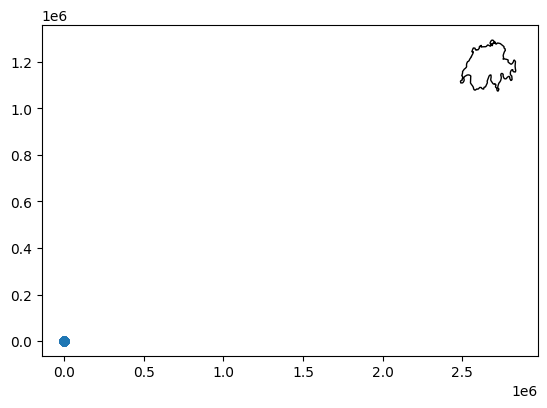

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=switzerland.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = switzerland_2056.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [ ]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

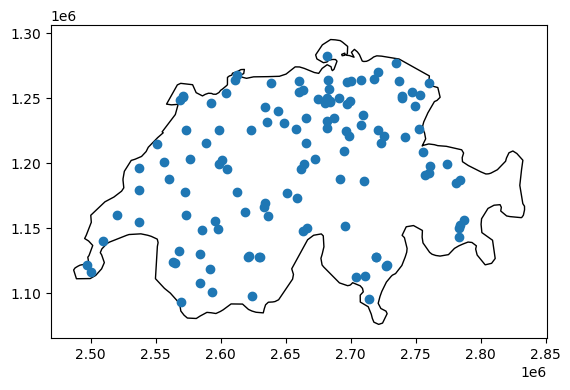

In [ ]:
airports_2056=airports.to_crs(2056)

## then

base = switzerland_2056.plot(color='white', edgecolor='black')
airports_2056.plot(ax=base)

In [ ]:
airports_2056['type'].value_counts() # this will not work: airports.type.value_counts()

type
heliport          51
small_airport     50
medium_airport    11
closed            10
large_airport      2
Name: count, dtype: int64

In [ ]:
airports_2056.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='airports', driver="GPKG")

EXERCISE 4

In [ ]:
switzerland_2056

COUNTRY                                           geometry
210  Switzerland  POLYGON ((2524351.653 1188067.976, 2525446.992...

In [ ]:
switzerland_2056.boundary

210    MULTILINESTRING ((2524351.653 1188067.976, 252...
dtype: geometry

<Axes: >

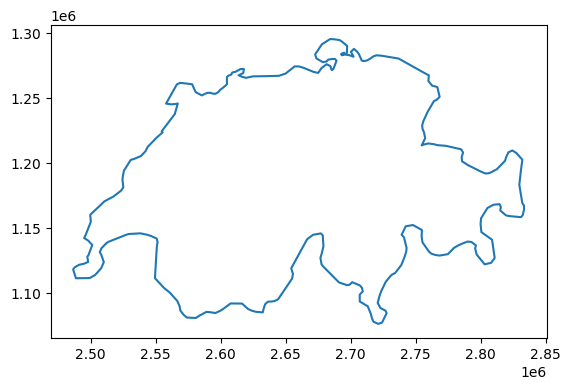

In [ ]:
# This is just the borderline
switzerland_2056.boundary.plot()

In [ ]:
# does 'boundary' return a GDF?
type(switzerland_2056.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
# converting into GDF
switzerland_2056.boundary.to_frame()

0
210  MULTILINESTRING ((2524351.653 1188067.976, 252...

In [ ]:
# conversion
switzerland_border=switzerland_2056.boundary.to_frame()

# new column (optional)
switzerland_border['name']='Switzerland'

# renaming the geometry column
switzerland_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
switzerland_border = switzerland_border.set_geometry("geometry")

# verifying:
switzerland_border.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

EXERCISE 5


In [ ]:
switzerland_states=gpd.read_file(os.path.join("maps","Historized_communes_1850_2016_shp","Historized_communes_1850_2016.shp"))
switzerland_municipalities=gpd.read_file(os.path.join("maps","Historized_communes_1850_2016_shp","Historized_communes_1850_2016.shp"))

In [ ]:
type(switzerland_states), type(switzerland_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [ ]:
switzerland_states.geometry.head()

0    POLYGON ((2680610.844 1236346.845, 2680592.844...
1    POLYGON ((2680610.844 1236346.845, 2680592.844...
2    POLYGON ((2676170.815 1235531.855, 2676150.815...
3    POLYGON ((2676837.841 1243164.830, 2676882.840...
4    POLYGON ((2680610.844 1236346.845, 2680607.844...
Name: geometry, dtype: geometry

In [ ]:
switzerland_municipalities.geometry.head()

0    POLYGON ((2680610.844 1236346.845, 2680592.844...
1    POLYGON ((2680610.844 1236346.845, 2680592.844...
2    POLYGON ((2676170.815 1235531.855, 2676150.815...
3    POLYGON ((2676837.841 1243164.830, 2676882.840...
4    POLYGON ((2680610.844 1236346.845, 2680607.844...
Name: geometry, dtype: geometry

<Axes: >

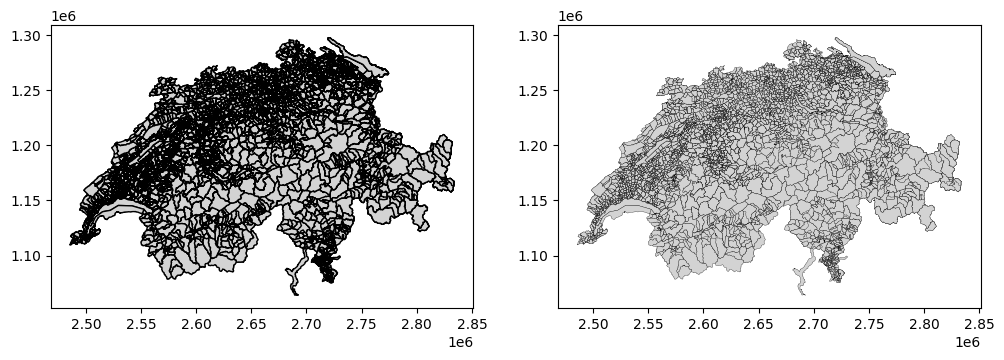

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

switzerland_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
switzerland_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [ ]:
switzerland_states.to_crs(2056)

GDEHISTID  GDENR             GDENAME  BEZHISTID  BEZNR  \
0         13256      1     Aeugst am Albis      10053    101   
1         11348      1              Aeugst      10053    101   
2         11742      2  Affoltern am Albis      10053    101   
3         11801      3          Bonstetten      10053    101   
4         11992      4     Hausen am Albis      10053    101   
...         ...    ...                 ...        ...    ...   
6216      90001   9790     Bodensee (D, A)          0      0   
6217      90004   9791  Lago di Lugano (I)          0      0   
6218      90006   9792   Lago Maggiore (I)          0      0   
6219      90005   9793       Lac Léman (F)          0      0   
6220      90007   9794       Verenahof (D)          0      0   

               BEZNAME  KTNR  KTKZ CODE_ISO  ARTID  ...    N_MIN    E_MAX  \
0     Bezirk Affoltern     1    ZH       CH     11  ...  1234585  2681156   
1     Bezirk Affoltern     1    ZH       CH     11  ...  1234585  2681156   
2     Bezirk Affoltern     1    ZH       CH     11  ...  1235217  2678571   
3     Bezirk Affoltern     1    ZH       CH     11  ...  1239005  2679646   
4     Bezirk Affoltern     1    ZH       CH     11  ...  1230170  2686461   
...                ...   ...   ...      ...    ...  ...      ...      ...   
6216              None     0  None       DA     13  ...  1261804  2774369   
6217              None     0  None       IT     13  ...  1084533  2730579   
6218              None     0  None       IT     13  ...  1064039  2701860   
6219              None     0  None       FR     13  ...  1128792  2552530   
6220              None     0  None       DE     11  ...  1290302  2691049   

        N_MAX Z_CNTR  Z_MIN  Z_MAX  Z_AVG  Z_MED     PUBDATE  \
0     1238540  700.0  533.0  885.0  684.0  673.0  2023-12-20   
1     1238540  700.0  533.0  885.0  684.0  673.0  2023-12-20   
2     1239340  490.0  440.0  749.0  528.0  501.0  2023-12-20   
3     1243165  544.0  502.0  712.0  580.0  582.0  2023-12-20   
4     1236412  609.0  524.0  914.0  674.0  653.0  2023-12-20   
...       ...    ...    ...    ...    ...    ...         ...   
6216  1297582  395.0  391.0  402.0  395.0  395.0  2023-12-20   
6217  1099669  270.0  270.0  281.0  270.0  270.0  2023-12-20   
6218  1108697  193.0  193.0  212.0  193.0  193.0  2023-12-20   
6219  1145409  372.0  372.0  375.0  372.0  372.0  2023-12-20   
6220  1291339  678.0  611.0  684.0  671.0  674.0  2023-12-20   

                                               geometry  
0     POLYGON ((2680610.844 1236346.845, 2680592.844...  
1     POLYGON ((2680610.844 1236346.845, 2680592.844...  
2     POLYGON ((2676170.815 1235531.855, 2676150.815...  
3     POLYGON ((2676837.841 1243164.830, 2676882.840...  
4     POLYGON ((2680610.844 1236346.845, 2680607.844...  
...                                                 ...  
6216  POLYGON ((2730670.827 1279696.449, 2730691.864...  
6217  MULTIPOLYGON (((2730002.739 1099540.420, 27300...  
6218  POLYGON ((2697317.344 1106369.064, 2697547.969...  
6219  POLYGON ((2551289.338 1138278.322, 2551288.963...  
6220  POLYGON ((2690996.646 1290345.497, 2690967.167...  

[6221 rows x 31 columns]

In [ ]:
# set as unprojected
switzerland_states.crs = "EPSG:2056"
switzerland_municipalities.crs = "EPSG:2056"

In [ ]:
switzerland_states=switzerland_states.to_crs(2056)
switzerland_municipalities=switzerland_municipalities.to_crs(2056)

EXERCISE 6


<Axes: >

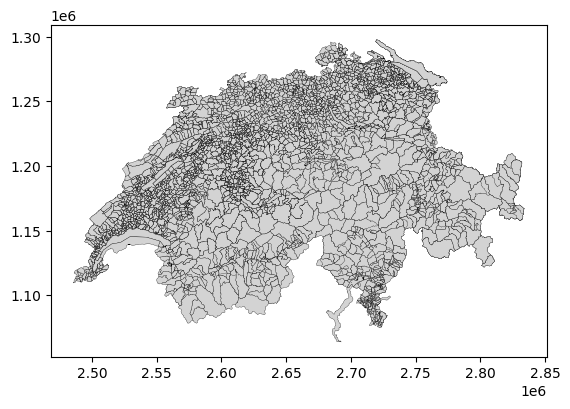

In [ ]:
switzerland_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [ ]:
#see
switzerland_municipalities.head()

GDEHISTID  GDENR             GDENAME  BEZHISTID  BEZNR           BEZNAME  \
0      13256      1     Aeugst am Albis      10053    101  Bezirk Affoltern   
1      11348      1              Aeugst      10053    101  Bezirk Affoltern   
2      11742      2  Affoltern am Albis      10053    101  Bezirk Affoltern   
3      11801      3          Bonstetten      10053    101  Bezirk Affoltern   
4      11992      4     Hausen am Albis      10053    101  Bezirk Affoltern   

   KTNR KTKZ CODE_ISO  ARTID  ...    N_MIN    E_MAX    N_MAX Z_CNTR  Z_MIN  \
0     1   ZH       CH     11  ...  1234585  2681156  1238540  700.0  533.0   
1     1   ZH       CH     11  ...  1234585  2681156  1238540  700.0  533.0   
2     1   ZH       CH     11  ...  1235217  2678571  1239340  490.0  440.0   
3     1   ZH       CH     11  ...  1239005  2679646  1243165  544.0  502.0   
4     1   ZH       CH     11  ...  1230170  2686461  1236412  609.0  524.0   

   Z_MAX  Z_AVG  Z_MED     PUBDATE  \
0  885.0  684.0  673.0  2023-12-20   
1  885.0  684.0  673.0  2023-12-20   
2  749.0  528.0  501.0  2023-12-20   
3  712.0  580.0  582.0  2023-12-20   
4  914.0  674.0  653.0  2023-12-20   

                                            geometry  
0  POLYGON ((2680610.844 1236346.845, 2680592.844...  
1  POLYGON ((2680610.844 1236346.845, 2680592.844...  
2  POLYGON ((2676170.815 1235531.855, 2676150.815...  
3  POLYGON ((2676837.841 1243164.830, 2676882.840...  
4  POLYGON ((2680610.844 1236346.845, 2680607.844...  

[5 rows x 31 columns]

In [ ]:
# higher level
switzerland_municipalities.BEZNAME.value_counts()

BEZNAME
Distretto di Lugano                     135
District de Morges                      107
Verwaltungskreis Bern-Mittelland        104
District de Moutier                      90
Amtsbezirk Thun                          90
                                       ... 
Bezirk Küssnacht (SZ)                     1
Bezirk Solothurn                          1
Bezirksfreies Gebiet Aargau               1
Bezirksfreies Gebiet Schaffhausen         1
Région sans district Valais / Wallis      1
Name: count, Length: 239, dtype: int64

<Axes: >

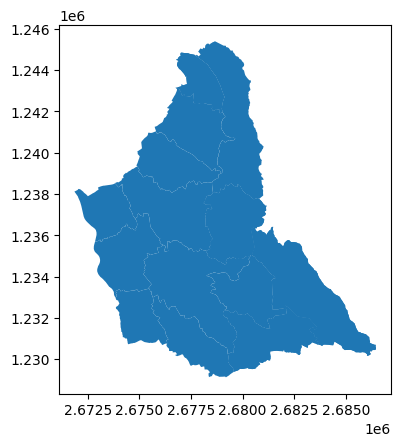

In [ ]:
switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].plot()

UNION


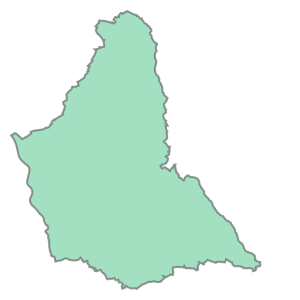

In [ ]:
switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].unary_union

In [ ]:
BezirkAffoltern_union=switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].unary_union

In [ ]:
# what do we have?
type(BezirkAffoltern_union)

shapely.geometry.polygon.Polygon

In [ ]:
gpd.GeoDataFrame(index=[0],data={'BEZNAME':'Bezirk Affoltern'},
                 crs=switzerland_municipalities.crs,
                 geometry=[BezirkAffoltern_union])

BEZNAME                                           geometry
0  Bezirk Affoltern  POLYGON ((2679195.802 1229129.854, 2679152.802...

DISSOLVE


<Axes: >

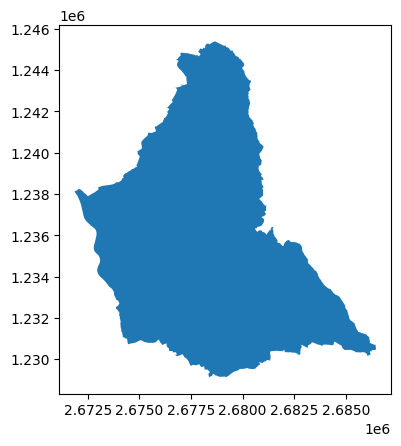

In [ ]:
switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].dissolve().plot()

In [ ]:
BezirkAffoltern_dissolve=switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].dissolve()

# we got?
type(BezirkAffoltern_dissolve)

geopandas.geodataframe.GeoDataFrame

In [ ]:
## see
BezirkAffoltern_dissolve

geometry  GDEHISTID  GDENR  \
0  POLYGON ((2679195.802 1229129.854, 2679152.802...      13256      1   

           GDENAME  BEZHISTID  BEZNR           BEZNAME  KTNR KTKZ CODE_ISO  \
0  Aeugst am Albis      10053    101  Bezirk Affoltern     1   ZH       CH   

   ...    E_MIN    N_MIN    E_MAX    N_MAX Z_CNTR  Z_MIN  Z_MAX  Z_AVG  Z_MED  \
0  ...  2678118  1234585  2681156  1238540  700.0  533.0  885.0  684.0  673.0   

      PUBDATE  
0  2023-12-20  

[1 rows x 31 columns]

In [ ]:
# keeping what is relevant
BezirkAffoltern_dissolve.drop(columns=['GDENAME','BEZHISTID','BEZNR'],inplace=True)

# then
BezirkAffoltern_dissolve

geometry  GDEHISTID  GDENR  \
0  POLYGON ((2679195.802 1229129.854, 2679152.802...      13256      1   

            BEZNAME  KTNR KTKZ CODE_ISO  ARTID  VALID_FROM  VALID_UNTI  ...  \
0  Bezirk Affoltern     1   ZH       CH     11  1976-11-15  2016-12-31  ...   

     E_MIN    N_MIN    E_MAX    N_MAX  Z_CNTR  Z_MIN  Z_MAX  Z_AVG  Z_MED  \
0  2678118  1234585  2681156  1238540   700.0  533.0  885.0  684.0  673.0   

      PUBDATE  
0  2023-12-20  

[1 rows x 28 columns]

<Axes: >

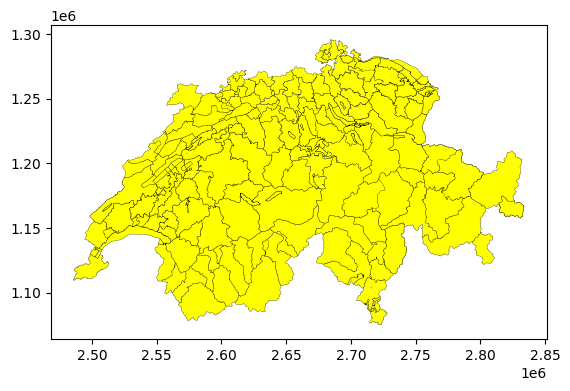

In [ ]:
# dissolving
switzerland_municipalities.dissolve(by='BEZNAME').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

In [ ]:
Switzerland_adm1_diss=switzerland_municipalities.dissolve(by='BEZNAME')

In [ ]:
Switzerland_adm1_diss

geometry  \
BEZNAME                                                                   
Aeusserer Landesteil  POLYGON ((2763178.324 1253664.696, 2763130.325...   
Amt Entlebuch         POLYGON ((2639340.403 1182794.917, 2639335.403...   
Amt Hochdorf          POLYGON ((2660358.781 1216039.943, 2660248.780...   
Amt Luzern            MULTIPOLYGON (((2664945.806 1213574.914, 26651...   
Amt Sursee            POLYGON ((2647745.645 1211413.010, 2647695.644...   
...                                                                 ...   
Wahlkreis Sursee      POLYGON ((2648810.643 1215284.991, 2648648.641...   
Wahlkreis Toggenburg  POLYGON ((2727610.714 1227589.764, 2727588.714...   
Wahlkreis Werdenberg  POLYGON ((2749115.689 1216437.751, 2749045.688...   
Wahlkreis Wil         MULTIPOLYGON (((2728675.732 1251509.710, 27286...   
Wahlkreis Willisau    POLYGON ((2640270.527 1208858.009, 2640250.527...   

                      GDEHISTID  GDENR         GDENAME  BEZHISTID  BEZNR  \
BEZNAME                                                                    
Aeusserer Landesteil      10834   3111         Oberegg      10198   1602   
Amt Entlebuch             12174   1001   Doppleschwand      10066    301   
Amt Hochdorf              11748   1021      Aesch (LU)      10065    302   
Amt Luzern                11743   1051     Adligenswil      10064    303   
Amt Sursee                11864   1081     Beromünster      10063    304   
...                         ...    ...             ...        ...    ...   
Wahlkreis Sursee          15663   1081     Beromünster      10301    314   
Wahlkreis Toggenburg      14434   3351  Alt St. Johann      10264   1727   
Wahlkreis Werdenberg      14405   3271      Buchs (SG)      10267   1724   
Wahlkreis Wil             14451   3401      Degersheim      10268   1728   
Wahlkreis Willisau        15537   1121       Alberswil      10302    315   

                      KTNR KTKZ CODE_ISO  ARTID  ...    E_MIN    N_MIN  \
BEZNAME                                          ...                     
Aeusserer Landesteil    16   AI       CH     11  ...  2756238  1251285   
Amt Entlebuch            3   LU       CH     11  ...  2645086  1205148   
Amt Hochdorf             3   LU       CH     11  ...  2659703  1232925   
Amt Luzern               3   LU       CH     11  ...  2668499  1212170   
Amt Sursee               3   LU       CH     11  ...  2656456  1226830   
...                    ...  ...      ...    ...  ...      ...      ...   
Wahlkreis Sursee         3   LU       CH     11  ...  2652631  1223147   
Wahlkreis Toggenburg    17   SG       CH     11  ...  2735029  1223063   
Wahlkreis Werdenberg    17   SG       CH     11  ...  2748596  1222528   
Wahlkreis Wil           17   SG       CH     11  ...  2728601  1245597   
Wahlkreis Willisau       3   LU       CH     11  ...  2641014  1220170   

                        E_MAX    N_MAX  Z_CNTR  Z_MIN   Z_MAX   Z_AVG   Z_MED  \
BEZNAME                                                                         
Aeusserer Landesteil  2764420  1256398   872.0  541.0  1135.0   870.0   881.0   
Amt Entlebuch         2647809  1209235   750.0  593.0   970.0   759.0   752.0   
Amt Hochdorf          2662531  1236207   479.0  448.0   635.0   497.0   482.0   
Amt Luzern            2672601  1215480   535.0  459.0   750.0   587.0   580.0   
Amt Sursee            2658248  1229347   641.0  613.0   695.0   653.0   652.0   
...                       ...      ...     ...    ...     ...     ...     ...   
Wahlkreis Sursee      2660421  1233775   641.0  448.0   853.0   703.0   703.0   
Wahlkreis Toggenburg  2743949  1232552   890.0  853.0  2306.0  1419.0  1405.0   
Wahlkreis Werdenberg  2756544  1230000   450.0  439.0  2229.0   750.0   450.0   
Wahlkreis Wil         2734663  1252482   816.0  632.0  1060.0   806.0   805.0   
Wahlkreis Willisau    2643136  1223360   519.0  510.0   653.0   537.0   528.0   

                         PUBDATE  
BEZNAME                           
Aeusserer L

In [ ]:
Switzerland_adm1_diss.drop(columns=['GDENAME','BEZHISTID','BEZNR'],inplace=True)
Switzerland_adm1_diss.reset_index(inplace=True)
Switzerland_adm1_diss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BEZNAME     239 non-null    object  
 1   geometry    239 non-null    geometry
 2   GDEHISTID   239 non-null    int64   
 3   GDENR       239 non-null    int64   
 4   KTNR        239 non-null    int64   
 5   KTKZ        239 non-null    object  
 6   CODE_ISO    239 non-null    object  
 7   ARTID       239 non-null    int64   
 8   VALID_FROM  239 non-null    object  
 9   VALID_UNTI  239 non-null    object  
 10  LAKENR      239 non-null    int64   
 11  LAKENAME    19 non-null     object  
 12  FLAG_ID     239 non-null    int64   
 13  MOD_GEOM    239 non-null    int64   
 14  INIMUT      239 non-null    int64   
 15  FINMUT      239 non-null    int64   
 16  E_CNTR      239 non-null    int64   
 17  N_CNTR      239 non-null    int64   
 18  E_MIN       239 non-null    int64   
 19  

EXERCISE 7

In [ ]:
switzerland_2056.centroid

210    POINT (2660562.350 1183909.065)
dtype: geometry

In [ ]:
# then
switzerland_2056.centroid.x.values[0],switzerland_2056.centroid.y.values[0]

(2660562.350168265, 1183909.0647437454)

In [ ]:
airports_2056

name            kind  latitude_deg  \
0                            Zürich Airport   large_airport     47.458056   
1     Geneva Cointrin International Airport   large_airport     46.238098   
2                              Bern Airport  medium_airport     46.912868   
3                              Sion Airport  medium_airport     46.219166   
4           Sankt Gallen Altenrhein Airport  medium_airport     47.485001   
..                                      ...             ...           ...   
119                       Zermatt  Heliport        heliport     46.029320   
120   Zürich Triemli City Hospital Heliport        heliport     47.366516   
121      Zürich Waid City Hospital Heliport        heliport     47.398104   
122     Zurich Children's Hospital Heliport        heliport     47.372022   
123  University Hospital of Zurich Heliport        heliport     47.376917   

     longitude_deg  elevation_ft region_name municipality  \
0         8.548056        1417.0      Zürich       Zurich   
1         6.108950        1411.0      Geneva       Geneva   
2         7.498512        1671.0        Bern         Bern   
3         7.326944        1582.0      Valais         Sion   
4         9.560770        1306.0  St. Gallen   St. Gallen   
..             ...           ...         ...          ...   
119       7.753366           NaN      Valais      Zermatt   
120       8.497469           NaN      Zürich       Zürich   
121       8.521438        1594.0      Zürich       Zürich   
122       8.557160           NaN      Zürich       Zürich   
123       8.551108           NaN      Zürich       Zürich   

                            geometry  
0    POINT (2683656.298 1256954.707)  
1    POINT (2497436.390 1121610.869)  
2    POINT (2604561.585 1195753.337)  
3    POINT (2591380.721 1118641.514)  
4    POINT (2759924.446 1261522.213)  
..                               ...  
119  POINT (2624369.500 1097579.411)  
120  POINT (2679979.366 1246725.207)  
121  POINT (2681741.282 1250261.606)  
122  POINT (2684479.080 1247399.864)  
123  POINT (2684014.309 1247937.548)  

[124 rows x 8 columns]

In [ ]:
# coordinates
centroidX,centroidY=switzerland_2056.centroid.x.values[0],switzerland_2056.centroid.y.values[0]

# subsets of medium airports
Switzerland_AirTopLeft=airports_2056[airports_2056.kind=='medium_airport'].cx[:centroidX,centroidY:]
Switzerland_AirTopRight=airports_2056[airports_2056.kind=='medium_airport'].cx[centroidX:,centroidY:]
Switzerland_AirBottomLeft=airports_2056[airports_2056.kind=='medium_airport'].cx[:centroidX,:centroidY]
Switzerland_AirBottomRight=airports_2056[airports_2056.kind=='medium_airport'].cx[centroidX:,:centroidY]

In [ ]:
base=Switzerland_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Switzerland_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Switzerland_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Switzerland_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

<Axes: >

In [ ]:
Switzerland_AirTopRight

name            kind  latitude_deg  \
4   Sankt Gallen Altenrhein Airport  medium_airport     47.485001   
29               Dübendorf Air Base  medium_airport     47.398602   
53                   Emmen Air Base  medium_airport     47.092444   
54                 Alpnach Air Base  medium_airport     46.943901   

    longitude_deg  elevation_ft region_name municipality  \
4        9.560770        1306.0  St. Gallen   St. Gallen   
29       8.648230        1470.0      Zürich       Zurich   
53       8.305184        1400.0     Lucerne          NaN   
54       8.284170        1460.0    Obwalden      Alpnach   

                           geometry  
4   POINT (2759924.446 1261522.213)  
29  POINT (2691311.205 1250456.780)  
53  POINT (2665792.245 1216078.232)  
54  POINT (2664374.728 1199547.944)

In [ ]:
Switzerland_AirTopRight.convex_hull.plot()

<Axes: >

<Axes: >

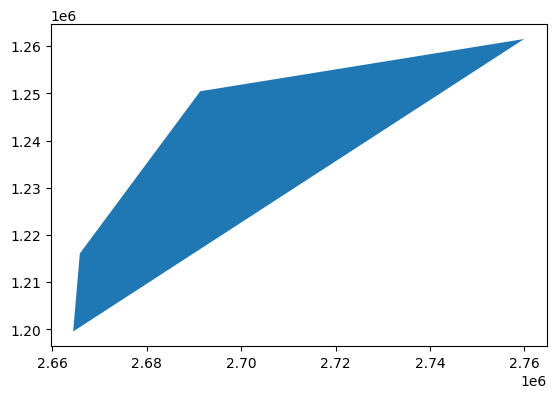

In [ ]:
Switzerland_AirTopRight.dissolve().convex_hull.plot()

In [ ]:
Switzerland_AirTopRight.dissolve().convex_hull

0    POLYGON ((2664374.728 1199547.944, 2665792.245...
dtype: geometry

In [ ]:
switzerland_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

<Axes: >

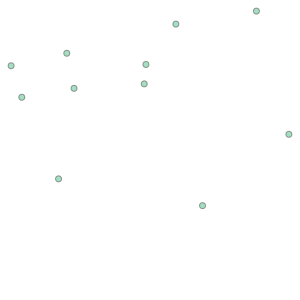

In [ ]:
# just the union
medium_airport=airports_2056[airports_2056.kind=='medium_airport']
medium_airport.unary_union

In [ ]:
# hull of the union
medium_airport.unary_union.convex_hull

In [ ]:
MediumAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=medium_airport.crs,
                                    geometry=[medium_airport.unary_union.convex_hull])
MediumAirport_hull['name']='medium airports hull' # optional

# then

MediumAirport_hull

geometry                  name
0  POLYGON ((2714021.463 1095818.418, 2591380.721...  medium airports hull

In [ ]:
base=switzerland_2056.plot(facecolor='yellow')
medium_airport.plot(ax=base)
MediumAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

<Axes: >

EXERCISE 8

In [ ]:
# the north
MunisN_switzerland=switzerland_municipalities.cx[:,centroidY:]
# the south
MunisS_switzerland=switzerland_municipalities.cx[:,:centroidY]
# the west
MunisW_switzerland=switzerland_municipalities.cx[:centroidX,:]
# the east
MunisE_switzerland=switzerland_municipalities.cx[centroidX:,:]

<Axes: >

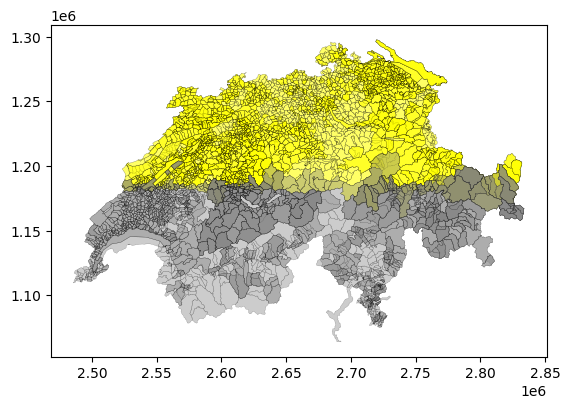

In [ ]:
base=MunisN_switzerland.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisS_switzerland.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

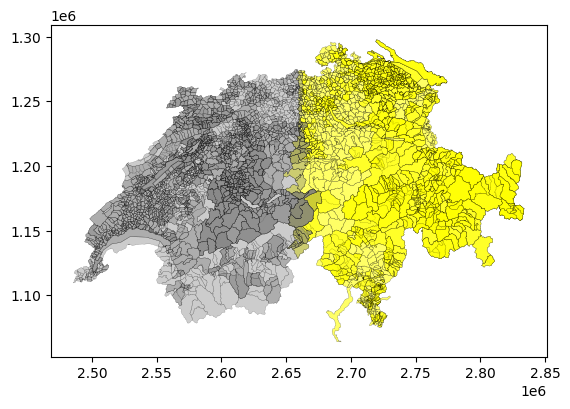

In [ ]:
base=MunisE_switzerland.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisW_switzerland.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

Intersection

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


<Axes: >

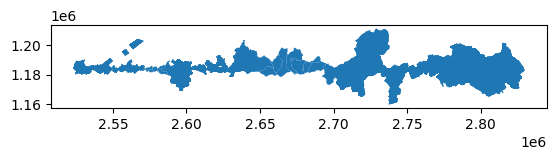

In [ ]:
munisNS_switzerland=MunisN_switzerland.overlay(MunisS_switzerland, how="intersection",keep_geom_type=True)
munisNS_switzerland.plot()

<Axes: >

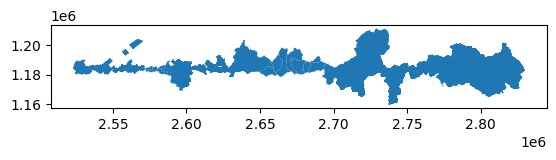

In [ ]:
MunisN_switzerland.sjoin(MunisS_switzerland, how="inner", predicate='contains').plot()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


<Axes: >

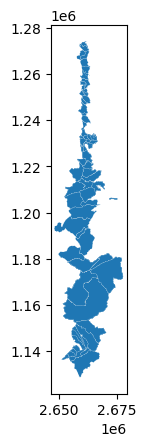

In [ ]:
# keeping the overlay
munisWE_switzerland=MunisW_switzerland.overlay(MunisE_switzerland, how="intersection",keep_geom_type=True)
munisWE_switzerland.plot(edgecolor='white',linewidth=0.1)

In [ ]:
munisNS_switzerland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GDEHISTID_1   1310 non-null   int64   
 1   GDENR_1       1310 non-null   int64   
 2   GDENAME_1     1310 non-null   object  
 3   BEZHISTID_1   1310 non-null   int64   
 4   BEZNR_1       1310 non-null   int64   
 5   BEZNAME_1     1310 non-null   object  
 6   KTNR_1        1310 non-null   int64   
 7   KTKZ_1        1310 non-null   object  
 8   CODE_ISO_1    1310 non-null   object  
 9   ARTID_1       1310 non-null   int64   
 10  VALID_FROM_1  1310 non-null   object  
 11  VALID_UNTI_1  1310 non-null   object  
 12  LAKENR_1      1310 non-null   int64   
 13  LAKENAME_1    47 non-null     object  
 14  FLAG_ID_1     1310 non-null   int64   
 15  MOD_GEOM_1    1310 non-null   int64   
 16  INIMUT_1      1310 non-null   int64   
 17  FINMUT_1      1310 non-null   int64   
 18  

In [ ]:
munisWE_switzerland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GDEHISTID_1   263 non-null    int64   
 1   GDENR_1       263 non-null    int64   
 2   GDENAME_1     263 non-null    object  
 3   BEZHISTID_1   263 non-null    int64   
 4   BEZNR_1       263 non-null    int64   
 5   BEZNAME_1     263 non-null    object  
 6   KTNR_1        263 non-null    int64   
 7   KTKZ_1        263 non-null    object  
 8   CODE_ISO_1    263 non-null    object  
 9   ARTID_1       263 non-null    int64   
 10  VALID_FROM_1  263 non-null    object  
 11  VALID_UNTI_1  263 non-null    object  
 12  LAKENR_1      263 non-null    int64   
 13  LAKENAME_1    1 non-null      object  
 14  FLAG_ID_1     263 non-null    int64   
 15  MOD_GEOM_1    263 non-null    int64   
 16  INIMUT_1      263 non-null    int64   
 17  FINMUT_1      263 non-null    int64   
 18  E_

In [ ]:
keep=['GDENAME_1','BEZNAME_1','GDENAME_2','geometry']
munisNS_switzerland=munisNS_switzerland.loc[:,keep]
munisWE_switzerland=munisWE_switzerland.loc[:,keep]

In [ ]:
# now
munisNS_switzerland.overlay(munisWE_switzerland,how="union",keep_geom_type=True)

GDENAME_1_1                       BEZNAME_1_1 GDENAME_2_1  \
0        Lungern                   Kanton Obwalden     Lungern   
1       Sachseln                   Kanton Obwalden    Sachseln   
2       Rüschegg          Amtsbezirk Schwarzenburg     Wahlern   
3       Rüschegg          Amtsbezirk Schwarzenburg     Wahlern   
4       Rüschegg  Verwaltungskreis Bern-Mittelland     Wahlern   
...          ...                               ...         ...   
1566         NaN                               NaN         NaN   
1567         NaN                               NaN         NaN   
1568         NaN                               NaN         NaN   
1569         NaN                               NaN         NaN   
1570         NaN                               NaN         NaN   

              GDENAME_1_2      BEZNAME_1_2          GDENAME_2_2  \
0                 Lungern  Kanton Obwalden              Lungern   
1                Sachseln  Kanton Obwalden             Sachseln   
2                     NaN              NaN                  NaN   
3                     NaN              NaN                  NaN   
4                     NaN              NaN                  NaN   
...                   ...              ...                  ...   
1566            Ritzingen      Bezirk Goms            Ritzingen   
1567           Grafschaft      Bezirk Goms            Ritzingen   
1568            Gluringen      Bezirk Goms  Reckingen-Gluringen   
1569       Reckingen (VS)      Bezirk Goms  Reckingen-Gluringen   
1570  Reckingen-Gluringen      Bezirk Goms  Reckingen-Gluringen   

                                               geometry  
0     POLYGON ((2649803.480 1182199.835, 2649843.480...  
1     POLYGON ((2661393.611 1192602.848, 2661470.611...  
2     POLYGON ((2593737.977 1181700.030, 2593797.977...  
3     POLYGON ((2593737.977 1181700.030, 2593797.977...  
4     POLYGON ((2593737.977 1181700.030, 2593797.977...  
...                                                 ...  
1566  POLYGON ((2659732.903 1146222.650, 2659757.905...  
1567  POLYGON ((2659732.903 1146222.650, 2659757.905...  
1568  POLYGON ((2657257.966 1150867.727, 2657384.969...  
1569  POLYGON ((2657209.967 1150952.728, 2657172.967...  
1570  POLYGON ((2657754.985 1151639.738, 2657794.986...  

[1571 rows x 7 columns]

In [ ]:
# appending
pd.concat([munisNS_switzerland,munisWE_switzerland],ignore_index=True)

<Axes: >

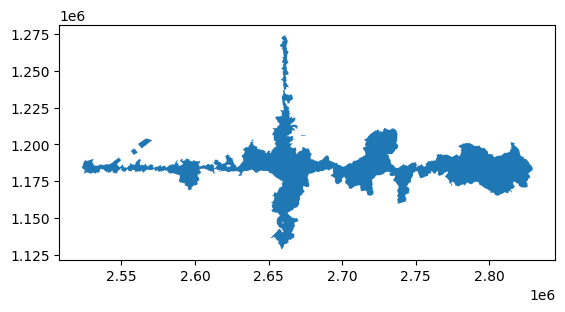

In [ ]:
munisNS_switzerland.dissolve().overlay(munisWE_switzerland.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [ ]:
muniMidswitzerland=munisNS_switzerland.dissolve().overlay(munisWE_switzerland.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidswitzerland

geometry GDENAME_1_1  \
0  MULTIPOLYGON (((2654976.795 1135619.555, 26549...    Rüschegg   

                BEZNAME_1_1 GDENAME_2_1 GDENAME_1_2      BEZNAME_1_2  \
0  Amtsbezirk Schwarzenburg     Wahlern     Lungern  Kanton Obwalden   

  GDENAME_2_2  
0     Lungern

In [ ]:
# some cleaning

muniMidswitzerland['zone']='middles'
muniMidswitzerland=muniMidswitzerland.loc[:,['GDENAME_1_1','zone','geometry']]
muniMidswitzerland

GDENAME_1_1     zone                                           geometry
0    Rüschegg  middles  MULTIPOLYGON (((2654976.795 1135619.555, 26549...

DIFFERENCE

<Axes: >

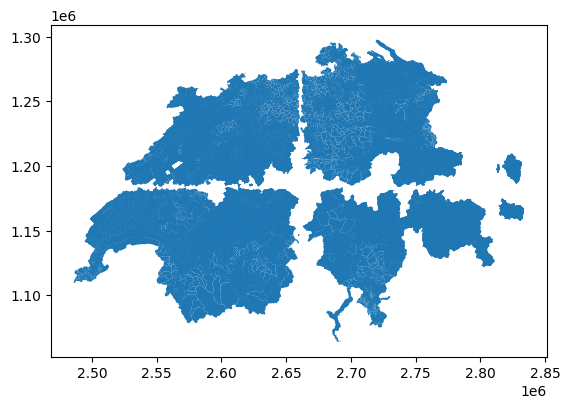

In [ ]:
# with the municipalities
switzerland_municipalities.overlay(muniMidswitzerland, how='difference').plot()

SYMMETRIC DIFFERENCE

<Axes: >

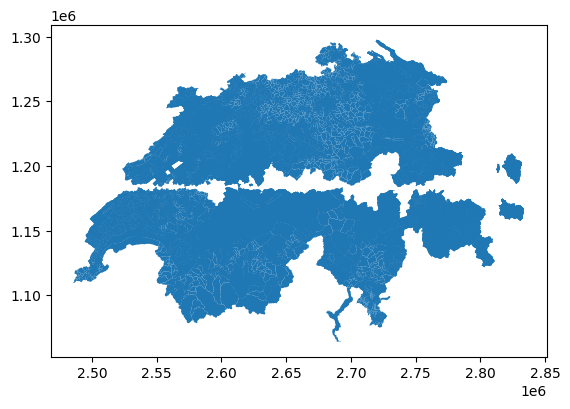

In [ ]:
MunisN_switzerland.overlay(MunisS_switzerland, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

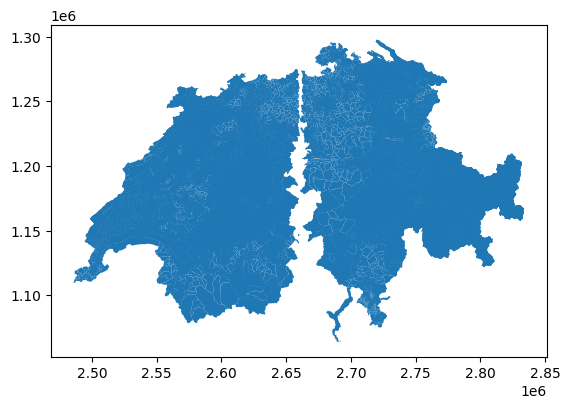

In [ ]:
MunisW_switzerland.overlay(MunisE_switzerland, how="symmetric_difference",keep_geom_type=False).plot()

In [ ]:
# hulls for the mid size airports:
Switzerland_AirTopLeft_hull=Switzerland_AirTopLeft.dissolve().convex_hull
Switzerland_AirTopRight_hull=Switzerland_AirTopRight.dissolve().convex_hull
Switzerland_AirBottomLeft_hull=Switzerland_AirBottomLeft.dissolve().convex_hull
Switzerland_AirBottomRight_hull=Switzerland_AirBottomRight.dissolve().convex_hull

<Axes: >

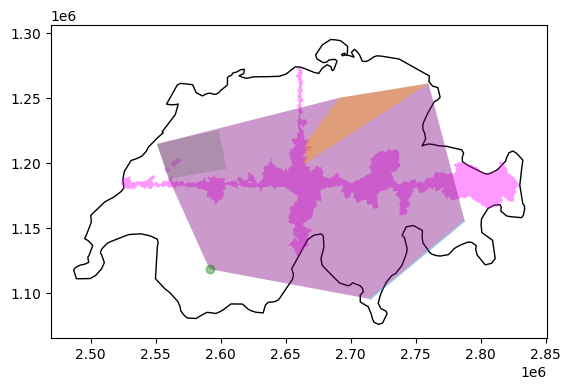

In [ ]:
base = switzerland_2056.plot(color='white', edgecolor='black') #unprojected
muniMidswitzerland.plot(ax=base,facecolor='magenta',alpha=0.4) #unprojected
LargeAirport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
Switzerland_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Switzerland_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
Switzerland_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
Switzerland_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)